<h1><center>DATASET OVERVIEW</center></h1>

This notebook is to analyse the various columns present in different tables given to us in the dataset. This would help us to understand the structure of the dataset, the information available and how to proceed with Exploratory Data Analysis (EDA) and Feature Engineering (FE) of various tables.

For this task, we shall be working with **HomeCredit_columns_description.csv** file present in the *data/original* folder of this project. This file contains all the columns present in different tables of the dataset, along with their corresponding description and special characteristics (if any).

<h2><center>Table of Content</center></h2>

- [1. Libraries and Constants](#1)
- [2. Structure of the Dataset](#2)
    - [2.1 Dataset Schema](#2.1)
    - [2.2 Main Table](#2.2)
- [3. Analyzing the Main Table](#3)
    - [3.1 Understanding the Values under the column *Special*](#3.1)
        - [3.1.1 Normalized](#3.1.1)
        - [3.1.2 Time Only Relative to the Application](#3.1.2)
        - [3.1.3 Hashed](#3.1.3)
        - [3.1.4 Rounded](#3.1.4)
        - [3.1.5 Grouped](#3.1.5)
        - [3.1.6 Recoded](#3.1.6)
- [4. Analyzing application_{train|test}.csv File Columns](#4)
    - [4.1 Normalized Columns](#4.1)
    - [4.2 Last 6 Columns](#4.2)
    - [4.3 Conclusion](#4.3)
- [5. Analyzing bureau_balance.csv File Columns](#5)
- [6. Analyzing bureau.csv File Columns](#6)
    - [6.1 Conclusion](#6.1)
- [7. Analyzing installments_payments.csv File Columns](#7)
- [8. Analyzing credit_card_balance.csv File Columns](#8)
    - [8.1 Conclusion](#8.1)
- [9. Analyzing POS_CASH_balance.csv File Columns](#9)
- [10. Analyzing previous_application.csv File Columns](#10)
    - [10.1 Conclusion](#10.1)
- [11. Strategy for EDA/FE for the Dataset](#11)

<div id="1"><h2>1 : Libraries and Constants</h2></div>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Going two folders back from the CWD i.e. EDA:

os.chdir("..")
os.chdir("..")

In [3]:
# Now we are in the actual root directory of the project:

ROOT_DIR = os.getcwd()
ROOT_DIR

'C:\\Users\\KIIT\\Desktop\\Home Credit Default Risk'

In [4]:
from src.eda.tabular import get_description

<div id="2"><h2>2 : Structure of the Dataset</h2></div>

<h3><div id="2.1">2.1 : Dataset Schema</div></h3>

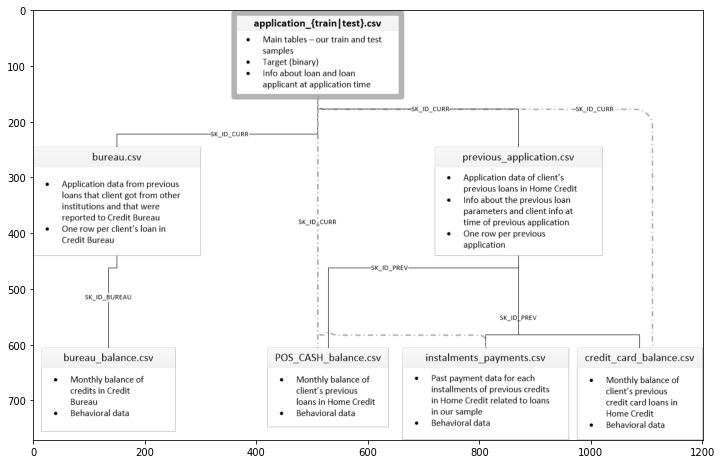

In [5]:
# Displaying the Dataset Schema:

img = plt.imread(
    os.path.join(ROOT_DIR,"data","original","dataset_structure.jpeg")
)
plt.figure(figsize=(12,10))
plt.imshow(img)

Note that tables in the dataset are linked with other tables via columns.

For example: tables *bureau.csv* and *bureau_balance.csv* are linked to each other via column *SK_ID_BUREAU*.

We shall categorize the tables according to the common column(s). The features obtained by analyzing each collection can then be merged in a bottom-up manner to eventually obtain the final feature map.

**Note: the bottom-most tables in the hierarchy contain the behavioural data, and the top-most table contains the static information of the client/customer.**

<h3><div id="2.2">2.2 : Main Table</div></h3>

In [6]:
# Fetching the table and renaming Row as Column:

table = pd.read_csv(
    os.path.join(ROOT_DIR,"data","original","HomeCredit_columns_description.csv"),
    encoding = "latin1", index_col = 0
).rename(columns={"Row": "Column"})

table.head()

,Table,Column,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [7]:
table.count()

Table          219
Column         219
Description    219
Special         86
dtype: int64

<div id="3"><h2>3: Analyzing Main Table</h2></div>

The table contains the information about many other files present in the dataset. The structure of these files can be analyzed using this table to obtain basic information about the entire dataset.

We first need to see what all files are present in the dataset.

In [8]:
list(table["Table"].unique())

['application_{train|test}.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'previous_application.csv',
 'installments_payments.csv']

In [9]:
table.groupby(by="Table").count()

,Column,Description,Special
Table,,,
POS_CASH_balance.csv,8,8,1
application_{train|test}.csv,122,122,56
bureau.csv,17,17,7
bureau_balance.csv,3,3,2
credit_card_balance.csv,23,23,3
installments_payments.csv,8,8,4
previous_application.csv,38,38,13


The names of the attributes *Column* and *Description* are self-explanatory. But the attribute *Special* does not clearly explain what it is about. Therefore, we need to examine the attribute *Special* to get an idea about what it conveys. This can be deduced by looking at the values contained in the attribute.

In [10]:
table["Special"].unique()

array([nan, 'normalized', 'time only relative to the application',
       'rounded', 'hashed', 'recoded', 'grouped'], dtype=object)

From above, we can deduce that the values under the attribute *Special* tell us about the nature of the data present for the given column and the file.

But not all columns in the dataset have any transformation applied to its values. It is because there are *NaN* values present under the *Special* attribute,which implies that quite many columns may not have been transformed (and are present in the dataset in raw form).

In [11]:
print(
    "Number of columns with NaN values\t: ",
    table["Special"].isnull().sum()
)
print(
    "Percentage of columns with NaN values\t: ",
    table["Special"].isnull().sum()/table["Column"].count()*100,
    "%"
)

Number of columns with NaN values	:  133
Percentage of columns with NaN values	:  60.73059360730594 %


We can observe that >60% of the columns in the dataset have not been transformed and are preent in the raw form. While performing *feature transformation*, these are the columns that may not require any futher transformations.

We further examine the distibution of the values under the column *Special* across the dataset.

In [12]:
df = pd.DataFrame(
    index = table["Special"].unique()
)

for filename in table["Table"].unique():
    temp_df = table[table["Table"]==filename]["Special"].value_counts(dropna=False).to_dict()
    df[filename] = temp_df
    
df.fillna(0,inplace=True)
df

,application_{train|test}.csv,bureau.csv,bureau_balance.csv,POS_CASH_balance.csv,credit_card_balance.csv,previous_application.csv,installments_payments.csv
NaN,66.0,10.0,1.0,7.0,20.0,25.0,4.0
normalized,51.0,0.0,0.0,0.0,0.0,3.0,0.0
time only relative to the application,4.0,4.0,1.0,1.0,1.0,6.0,2.0
rounded,1.0,0.0,0.0,0.0,0.0,1.0,0.0
hashed,0.0,2.0,1.0,0.0,2.0,2.0,2.0
recoded,0.0,1.0,0.0,0.0,0.0,0.0,0.0
grouped,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<div id="3.1"><h3>3.1 : Understanding the Values under the column <i>Special</i></h3></div>

We still do not have a clear idea about what each value in the column *Special* tells us. Maybe the description of the column names provided against the attribute give us some insights.

<div id="3.1.1"><h4>3.1.1 :  Normalized</h4></div>

In [13]:
get_description(table, "Special", "normalized")

ATTRIBUTE NAME:  normalized

->  Normalized population of region where client lives (higher number means the client lives in more populated region)

->  Normalized score from external data source

->  Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

->  Down payment rate normalized on previous credit

->  Interest rate normalized on previous credit


We may conclude that category *normalized* indicates that the values under the given column name have already been normalized and may not even require further transformation.

<div id="3.1.2"><h4>3.1.2 : Time Only Relative to the Application</h4></div>

In [14]:
get_description(table, "Special", "time only relative to the application")

ATTRIBUTE NAME:  time only relative to the application

->  Client's age in days at the time of application

->  How many days before the application the person started current employment

->  How many days before the application did client change his registration

->  How many days before the application did client change the identity document with which he applied for the loan

->  How many days before current application did client apply for Credit Bureau credit

->  Remaining duration of CB credit (in days) at the time of application in Home Credit

->  Days since CB credit ended at the time of application in Home Credit (only for closed credit)

->  How many days before loan application did last information about the Credit Bureau credit come

->  Month of balance relative to application date (-1 means the freshest balance date)

->  Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - of

It can be seen that the category *time only relative to the application* contains the number of days *from the day of application* when the action took place. In this case, *action* is described by the column name in the file. The value under this category is obtained by keeping the day of *current* application as the reference point.

<div id="3.1.3"><h4>3.1.3 : Hashed</h4></div>

In [15]:
get_description(table, "Special", "hashed")

ATTRIBUTE NAME:  hashed

->  ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau 

->  Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)

->  Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table 

->  ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)

->  ID of loan in our sample

->  ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) 


The above result implies that the category *hashed* refers to a value that uniquely identifies a record in the table. It acts the same way as *Primary Key/Foreign Key* does in an RDBMS.

<div id="3.1.4"><h4>3.1.4 : Rounded</h4></div>

In [16]:
get_description(table, "Special", "rounded")

ATTRIBUTE NAME:  rounded

->  Approximately at what hour did the client apply for the loan

->  Approximately at what day hour did the client apply for the previous application


The category *rounded* implies that the column contains an integer value that represents the hour of action.

<div id="3.1.5"><h4>3.1.5 : Grouped</h4></div>

In [17]:
get_description(table, "Special", "grouped")

ATTRIBUTE NAME:  grouped

->  Grouped interest rate into small medium and high of the previous application


The category *grouped* implies that the column contains the category of the interest rate rather than its numerical value. This means that the corresponding column is a categorical variable.

<dic id="3.1.6"><h4>3.1.6 : Recoded</h4></div> 

In [18]:
get_description(table, "Special", "recoded")

ATTRIBUTE NAME:  recoded

->  Recoded currency of the Credit Bureau credit


It appears that this may be about encoding a value that may otherwise be expressed differently by different people.

<h2><div id="4">4 : Analyzing application_{train|test}.csv File Columns</div></h2>

In [19]:
application_data = table[table["Table"]=="application_{train|test}.csv"]
application_data.head()

,Table,Column,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [20]:
list(application_data["Column"])

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

Many of these columns can be clustered into units on the basis of what they represent. This would help in reducing the complexity of the table and that of the model. This shall be done during the process of *Feature Engineering*.

For example: the variables related to contact information can be grouped together to generate an index. This would represent the risk associated with the person based on the number of ways he/she can be contacted. The number of ways of contacting a person is directly proportional to his reliability, and therefore, inversely proportional to the risk.

<h3><div id="4.1">4.1 : Normalized Columns</div></h3>

One observable trait is that some values in the table have been normalized (see "Special" column).

In [21]:
application_data[
    application_data["Special"]=="normalized"
].iloc[:,1:3].sort_values(by="Column")

,Column,Description
47,APARTMENTS_AVG,Normalized information about building where th...
75,APARTMENTS_MEDI,Normalized information about building where th...
61,APARTMENTS_MODE,Normalized information about building where th...
48,BASEMENTAREA_AVG,Normalized information about building where th...
76,BASEMENTAREA_MEDI,Normalized information about building where th...
62,BASEMENTAREA_MODE,Normalized information about building where th...
51,COMMONAREA_AVG,Normalized information about building where th...
79,COMMONAREA_MEDI,Normalized information about building where th...
65,COMMONAREA_MODE,Normalized information about building where th...
52,ELEVATORS_AVG,Normalized information about building where th...


It can be observed that one attribute (not column) has been expressed in terms of *mean, median and mode*. If any one of the three measures is available then we can estimate the *central tendency* of the given attribute. If all three measures are given, then we may even deduce the **skewness** of the distribution for the given attributes and Customer ID.

<h3><div id="4.2">4.2 : Last 6 Columns</div></h3>

The names of the last 6 columns (refer [Section 4](#4)) are not self-explanatory. Therefore we need to examine what these columns tell us.

In [22]:
application_data.iloc[-6:,1:3]

,Column,Description
119,AMT_REQ_CREDIT_BUREAU_HOUR,Number of enquiries to Credit Bureau about the...
120,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...
121,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...
122,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...
123,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...
124,AMT_REQ_CREDIT_BUREAU_YEAR,Number of enquiries to Credit Bureau about the...


The columns given above describe **the number of enquiries made *by the bank* to the Credit Bureau *regarding the client***. These enquiries have been made as early as an hour ago, as well as an year prior. Note that the number of enquiries made a day ago *exclude* the number of enquiries made an hour ago. Similary the number of enquiries made a week ago exclude those made an hour or a day ago.

In short, **the number of enquiries made in a timeframe category (hour/day/week/month/quarter/year) is exclusive of those made in categories having smaller timeframes**.

<h3><div id="4.3">4.3 : Conclusion</div></h3>

The table is about the basic information about the client. It contains information about his **personal details, assets and its details, status of contact details, employment details, peer group, status of documents submitted** and **the number of enquiries made to the credit bureau by the bank**.

However, this table does not provide any insights about the past credit history of the client and his behaviour regarding the payments. Therefore, we must gather these insights from other tables and aggregate them to this table to obtain the entire picture. This entire picture i.e. the final dataset can then be fitted to the ML model for making predictions.

**NOTE : there is only one record for each *current* loan application.**

<h2><div id="5">5 : Analyzing bureau_balance.csv File Columns</div></h2>

In [23]:
bureau_balance_data = table[table["Table"]=="bureau_balance.csv"].iloc[:,1:]
bureau_balance_data

,Column,Description,Special
142,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...,hashed
143,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
144,STATUS,Status of Credit Bureau loan during the month ...,NaN


The table contains the *snapshots* of monthly status of previous credits, as reported by the credit bureau.

The column STATUS can be used to determine the risk, as well as if the client defaulted by crossing 90 DPD limit.

**NOTE : the table contains many records for each *previous* credit.**

<h2><div id="6">6 : Analyzing bureau.csv File Columns</div></h2>

In [24]:
bureau_data = table[table["Table"]=="bureau.csv"].iloc[:,1:]
bureau_data

,Column,Description,Special
125,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
126,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
127,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
128,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
129,DAYS_CREDIT,How many days before current application did c...,time only relative to the application
130,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...,NaN
131,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...,time only relative to the application
132,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...,time only relative to the application
133,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...,NaN
134,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit pr...,NaN


The table contains information about all the previous credits extended to the client by different creditors prior to the current loan application. The data has been reported by the credit bureau.

**NOTE : there may be multiple records of *previous* credit corresponding the one *current* application.**

<h3><div id="6.1">6.1 : Conclusion</div></h3>

The data of the table can be used to determine how many loans did the client have in the past, and the number of outstanding loans currently. This can be used to estimate **the ability ton pay back the current loans given the credit history and current credit obligations**. Higher amount of credit obligations are associated with hiher default risk.

<h2><div id="7">7 : Analyzing installments_payments.csv File Columns</div></h2>

In [25]:
installments_table = table[table["Table"]=="installments_payments.csv"].iloc[:,1:]
installments_table

,Column,Description,Special
214,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
215,SK_ID_CURR,ID of loan in our sample,hashed
216,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for cred...,NaN
217,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
218,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
219,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
220,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN
221,AMT_PAYMENT,What the client actually paid on previous cred...,NaN


This table contains the data about the repayment history of a loan paid by the client at different instances of time. This can be used to **track the risk associated with the timely repayment of loans**.

**NOTE : the table contains many records for each *previous* credit**.

<h2><div id="8">8 : Analyzing credit_card_balance.csv File Columns</div></h2>

In [26]:
cc_balance_data = table[table["Table"]=="credit_card_balance.csv"].iloc[:,1:]
cc_balance_data

,Column,Description,Special
153,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
154,SK_ID_CURR,ID of loan in our sample,hashed
155,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
156,AMT_BALANCE,Balance during the month of previous credit,NaN
157,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the prev...,NaN
158,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the ...,NaN
159,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previou...,NaN
160,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of t...,NaN
161,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the mont...,NaN
162,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the prev...,NaN


The table contains the monthly snapshots of the balance of the credit cards availed by the client prior to the current application. This data can be used to study the spending pattern and monetary reserves of the client.

**NOTE: the table contains many records for each *previous* credit**.

<h3><div id="8.1">8.1 : Conclusion</div></h3>

The data of the table can be compared with the installments paid by the client to determine how sincerely the client intends to pay back the loans, i.e. **whether the client is a willful defaulter**. Willful defaulters are the worst kind of defaulters since they do not pay back the loans despite having the ability to do so. This is associated with a very high credit risk.

<h2><div id="9">9 : Analyzing POS_CASH_balance.csv Files Columns</div></h2>

In [27]:
pos_balance_data = table[table["Table"]=="POS_CASH_balance.csv"].iloc[:,1:]
pos_balance_data

,Column,Description,Special
145,SK_ID_PREV,ID of previous credit in Home Credit related t...,NaN
146,SK_ID_CURR,ID of loan in our sample,NaN
147,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
148,CNT_INSTALMENT,Term of previous credit (can change over time),NaN
149,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,NaN
150,NAME_CONTRACT_STATUS,Contract status during the month,NaN
151,SK_DPD,DPD (days past due) during the month of previo...,NaN
152,SK_DPD_DEF,DPD during the month with tolerance (debts wit...,NaN


This table contains the monthly snapshots of the balance maintained by the borrower against the *cash loan* at the *previous Point of Sale (POS)*.

**NOTE: the table contains many rows for each *previous* credit**.

<h2><div id="10">10 : Analyzing previous_application.csv File Columns</div></h2>

In [28]:
prev_application_data = table[table["Table"]=="previous_application.csv"].iloc[:,1:]
prev_application_data

,Column,Description,Special
176,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
177,SK_ID_CURR,ID of loan in our sample,hashed
178,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
179,AMT_ANNUITY,Annuity of previous application,NaN
180,AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
181,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
182,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
183,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN
184,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,NaN
185,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...,rounded


This table contains the information associated with each previous loan application made by the client before applying for the current loan.

**NOTE: the table may contain many *previous* applications for each *current* application**.

<h3><div id="10.1">10.1 : Conclusion</div></h3>

Once aggregated with the behavioural data about installment payments and credit card history, the table would be able to represent the credit history of the client appropriately. **Credit history is a very crucial determinant for credit approval**.

<h2><div id="11">11 : Strategy for EDA/FE for the Dataset</div></h2>

- We first use the *bureau_balance.csv* to quantify the spending behavior of the client based on the balance maintained by him against the borrowed amount. This data can then be aggregated with *bureau.csv* data.

- Thereafter we use *installments_payments.csv*, *POS_CASH_balance.csv* and *credit_card_balance* to quntify the borrower's *willingness to pay* based on the installments paid against the balance present in the credit card. This shall be used to identify *willful defaulters*.

- Lastly, the aforementioned results can be merged with *application_train.csv* and *application_test.csv* to obtain the final feature map, which we would be using to select the ML model and to train it.